In [1]:
# Predicting the ultimate tensile strength of AISI 1045 steel
# and 2017-T4 aluminum alloy joints in a laser-assisted rotary friction
# welding process using machine learning: a comparison with response
# surface methodology

In [2]:
#IMPORTING THE NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#LOADING THE DATA

df = pd.read_csv(r"C:\Users\tamil\Desktop\FINAL_YEAR_PROJECT\predicting_uts.csv")
df.head()

,ROTATION_SPEED,FRICTION_POWER,LASER_POWER,UTS
0,1600,14,0,160
1,1600,21,0,65
2,1800,14,0,165
3,1800,21,0,105
4,1600,14,600,115


In [4]:
#statistics about the data

df.describe()

,ROTATION_SPEED,FRICTION_POWER,LASER_POWER,UTS
count,16.000000,16.000000,16.000000,16.000000
mean,1700.000000,17.500000,600.000000,143.562500
std,103.279556,3.614784,386.436713,40.359995
min,1600.000000,14.000000,0.000000,65.000000
25%,1600.000000,14.000000,450.000000,113.750000
50%,1700.000000,17.500000,700.000000,150.000000
75%,1800.000000,21.000000,850.000000,170.000000
max,1800.000000,21.000000,1000.000000,205.000000


In [7]:
#CHECKING FOR NULL VALUES

df.isna().sum()

ROTATION_SPEED    0
FRICTION_POWER    0
LASER_POWER       0
UTS               0
dtype: int64

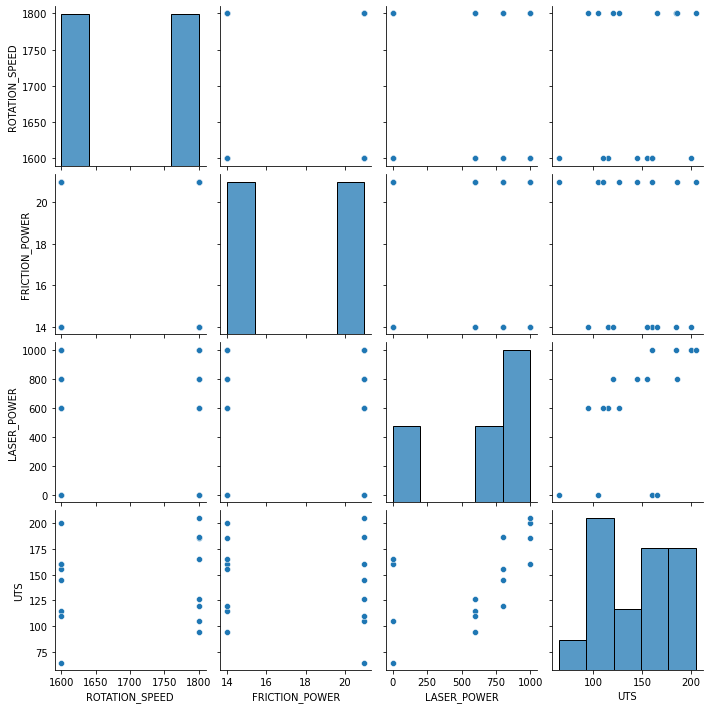

In [8]:
#DOING SOME EXPLANATORY DATA ANALYSIS

sns.pairplot(df)

<AxesSubplot:xlabel='ROTATION_SPEED', ylabel='UTS'>

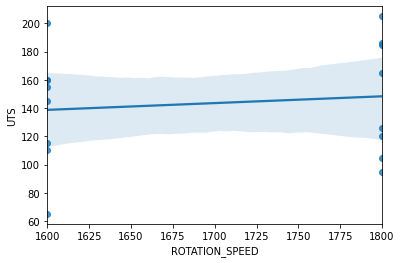

In [10]:
sns.regplot(x=df.ROTATION_SPEED,y=df.UTS,data = df)

<AxesSubplot:xlabel='FRICTION_POWER', ylabel='UTS'>

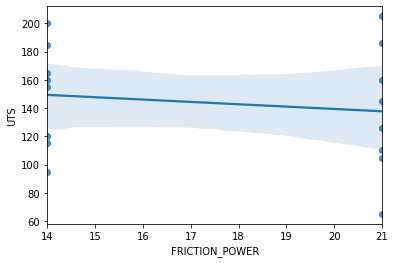

In [11]:
sns.regplot(x=df.FRICTION_POWER,y=df.UTS,data = df)

<AxesSubplot:xlabel='LASER_POWER', ylabel='UTS'>

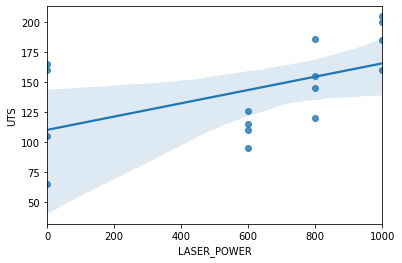

In [12]:
sns.regplot(x=df.LASER_POWER,y=df.UTS,data = df)

# SPLITTING TO TRAINING AND TESTING SETS

In [6]:
X = df.drop('UTS', axis='columns')
y = df.UTS

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [9]:
#IMPORTING NECESSARY MODELS

from sklearn import tree
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold

In [10]:
#SUPPORT VECTOR REGRESSOR

model_svr = SVR(
    kernel = 'poly',
    C = 100,
    degree = 3,
    epsilon = 0.01
)

model_svr.fit(X,y)

#ACCURACY OF THE MODEL
model_svr.score(X_train,y_train)

0.453643059497171

In [11]:
#RANDOM FOREST REGRESSOR

model_rfr = RandomForestRegressor(
    n_estimators=100,
    max_depth=120
)
model_rfr.fit(X,y)


#ACCURACY OF THE MODEL
model_rfr.score(X_train,y_train)

0.8764127820270384

In [12]:
#DECISION TREE REGRESSOR

model_dt = tree.DecisionTreeRegressor(
    max_depth=20
)
model_dt.fit(X,y)

#ACCURACY OF THE MODEL
model_dt.score(X_train,y_train)

1.0

In [13]:
#GAUSSIAN PROCESS REGRESSOR

model_gpr = GaussianProcessRegressor(
    alpha = 0.001,
    n_restarts_optimizer=9
)
model_gpr.fit(X,y)
model_gpr.score(X_train,y_train)

0.9999797838185589

In [14]:
#MULTI LAYER PERCEPTRON

model_mlp = MLPRegressor(
    hidden_layer_sizes=40,
    activation='relu',
    max_iter=3000
)

model_mlp.fit(X,y)


#ACCURACY OF THE MODEL
model_mlp.score(X_train,y_train)

C:\Users\tamil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7389998096723356

In [15]:
#DECISION TREE REGRESSOR AND GAUSSIAN PROCESS REGRESSOR IS THE BEST MODEL

y_pred = model_dt.predict(X_test)

In [16]:
print(y_test)

1     65
7    110
0    160
4    115
Name: UTS, dtype: int64


In [17]:
print(y_pred)

[ 65. 110. 160. 115.]


In [18]:
yp = model_gpr.predict(X_test)

In [19]:
print(yp)

[ 64.93506494 109.89010989 159.84015984 114.88511489]


In [23]:
x = np.array([[1700,16,800]])

yp = model_dt.predict(x)

In [24]:
print(yp)

[155.]
